In [83]:
# 1. Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests  # Adicionado para fazer requisições HTTP

# Bibliotecas para modelos de Machine Learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Biblioteca para testes estatísticos
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

# Configurações gerais
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')


In [84]:
# 2. Definir parâmetros gerais
data_inicio = '01.01.2014'
data_final = '31.12.2023'  # Ajuste conforme necessário
url_base = 'http://localhost:3000/query2'

# Lista de empresas com seus símbolos, ramos e setores
# Lista de empresas com seus símbolos e ramos
empresas = [
    {'Simbolo': 'Airbus', 'Ramo': 'Aviacao'},
    {'Simbolo': 'Air Canada', 'Ramo': 'Aviacao'},
    {'Simbolo': 'Air China', 'Ramo': 'Aviacao'},
    {'Simbolo': 'Air France', 'Ramo': 'Aviacao'},
    {'Simbolo': 'Alaska Air Group', 'Ramo': 'Aviacao'},
    {'Simbolo': 'American Airlines', 'Ramo': 'Aviacao'},
    {'Simbolo': 'Azul', 'Ramo': 'Aviacao'},
    {'Simbolo': 'Boeing', 'Ramo': 'Aviacao'},
    {'Simbolo': 'Cargojet', 'Ramo': 'Aviacao'},
    {'Simbolo': 'China Airlines', 'Ramo': 'Aviacao'},
    {'Simbolo': 'Delta Air Lines', 'Ramo': 'Aviacao'},
    {'Simbolo': 'Embraer', 'Ramo': 'Aviacao'},
    {'Simbolo': 'Gol Linhas Aéreas', 'Ramo': 'Aviacao'},
    {'Simbolo': 'Japan Airlines', 'Ramo': 'Aviacao'},
    {'Simbolo': 'LATAM', 'Ramo': 'Aviacao'},
    {'Simbolo': 'Lockheed Martin', 'Ramo': 'Aviacao'},
    {'Simbolo': 'Lufthansa', 'Ramo': 'Aviacao'},
    {'Simbolo': 'Ryanair', 'Ramo': 'Aviacao'},
    {'Simbolo': 'Turkish Airlines', 'Ramo': 'Aviacao'},
    {'Simbolo': 'United Airlines', 'Ramo': 'Aviacao'},
    {'Simbolo': 'Chalco', 'Ramo': 'Commodities'},
    {'Simbolo': 'Archer Daniels Midland', 'Ramo': 'Commodities'},
    {'Simbolo': 'Bunge', 'Ramo': 'Commodities'},
    {'Simbolo': 'China Steel', 'Ramo': 'Commodities'},
    {'Simbolo': 'Glencore', 'Ramo': 'Commodities'},
    {'Simbolo': 'GrainCorp', 'Ramo': 'Commodities'},
    {'Simbolo': 'Mitsui', 'Ramo': 'Commodities'},
    {'Simbolo': 'Norsk Hydro', 'Ramo': 'Commodities'},
    {'Simbolo': 'Nucor', 'Ramo': 'Commodities'},
    {'Simbolo': 'Reliance Industries', 'Ramo': 'Commodities'},
    {'Simbolo': 'Sakata Seed', 'Ramo': 'Commodities'},
    {'Simbolo': 'Severstal', 'Ramo': 'Commodities'},
    {'Simbolo': 'Einhell Germany', 'Ramo': 'EquipamentosIndustriais'},
    {'Simbolo': 'Enerpac', 'Ramo': 'EquipamentosIndustriais'},
    {'Simbolo': 'Illinois Tool Works', 'Ramo': 'EquipamentosIndustriais'},
    {'Simbolo': 'Makita', 'Ramo': 'EquipamentosIndustriais'},
    {'Simbolo': 'Snap-On', 'Ramo': 'EquipamentosIndustriais'},
    {'Simbolo': 'Stanley Black & Decker', 'Ramo': 'EquipamentosIndustriais'},
    {'Simbolo': 'ToughBuilt', 'Ramo': 'EquipamentosIndustriais'},
    {'Simbolo': 'TOYA', 'Ramo': 'EquipamentosIndustriais'},
    {'Simbolo': 'Cacau', 'Ramo': 'Futures'},
    {'Simbolo': 'Café', 'Ramo': 'Futures'},
    {'Simbolo': 'Cobre', 'Ramo': 'Futures'},
    {'Simbolo': 'Algodão', 'Ramo': 'Futures'},
    {'Simbolo': 'Petróleo Bruto', 'Ramo': 'Futures'},
    {'Simbolo': 'Ouro', 'Ramo': 'Futures'},
    {'Simbolo': 'Óleo de aquecimento', 'Ramo': 'Futures'},
    {'Simbolo': 'Gado vivo', 'Ramo': 'Futures'},
    {'Simbolo': 'Gás natural', 'Ramo': 'Futures'},
    {'Simbolo': 'Paládio', 'Ramo': 'Futures'},
    {'Simbolo': 'Platina', 'Ramo': 'Futures'},
    {'Simbolo': 'Gasolina', 'Ramo': 'Futures'},
    {'Simbolo': 'Arroz', 'Ramo': 'Futures'},
    {'Simbolo': 'Prata', 'Ramo': 'Futures'},
    {'Simbolo': 'Soja', 'Ramo': 'Futures'},
    {'Simbolo': 'CAC 40', 'Ramo': 'Indices'},
    {'Simbolo': 'CBOE VIX', 'Ramo': 'Indices'},
    {'Simbolo': 'DAX', 'Ramo': 'Indices'},
    {'Simbolo': 'Dow Jones', 'Ramo': 'Indices'},
    {'Simbolo': 'FTSE 100', 'Ramo': 'Indices'},
    {'Simbolo': 'Hang Seng', 'Ramo': 'Indices'},
    {'Simbolo': 'Bovespa', 'Ramo': 'Indices'},
    {'Simbolo': 'NASDAQ', 'Ramo': 'Indices'},
    {'Simbolo': 'Nikkei', 'Ramo': 'Indices'},
    {'Simbolo': 'Russell 2000', 'Ramo': 'Indices'},
    {'Simbolo': 'S&P 500', 'Ramo': 'Indices'},
    {'Simbolo': 'Aston Martin', 'Ramo': 'IndustriaAutomotiva'},
    {'Simbolo': 'BMW', 'Ramo': 'IndustriaAutomotiva'},
    {'Simbolo': 'Porsche', 'Ramo': 'IndustriaAutomotiva'},
    {'Simbolo': 'Ferrari', 'Ramo': 'IndustriaAutomotiva'},
    {'Simbolo': 'Ford', 'Ramo': 'IndustriaAutomotiva'},
    {'Simbolo': 'General Motors', 'Ramo': 'IndustriaAutomotiva'},
    {'Simbolo': 'Honda', 'Ramo': 'IndustriaAutomotiva'},
    {'Simbolo': 'Hyundai', 'Ramo': 'IndustriaAutomotiva'},
    {'Simbolo': 'IVECO', 'Ramo': 'IndustriaAutomotiva'},
    {'Simbolo': 'Mercedes-Benz', 'Ramo': 'IndustriaAutomotiva'},
    {'Simbolo': 'Mitsubishi Motors', 'Ramo': 'IndustriaAutomotiva'},
    {'Simbolo': 'Nissan', 'Ramo': 'IndustriaAutomotiva'},
    {'Simbolo': 'Rheinmetall', 'Ramo': 'IndustriaAutomotiva'},
    {'Simbolo': 'Stellantis', 'Ramo': 'IndustriaAutomotiva'},
    {'Simbolo': 'Tesla', 'Ramo': 'IndustriaAutomotiva'},
    {'Simbolo': 'Toyota', 'Ramo': 'IndustriaAutomotiva'},
    {'Simbolo': 'Volkswagen', 'Ramo': 'IndustriaAutomotiva'},
    {'Simbolo': 'Alexandria REIT', 'Ramo': 'MercadoImobiliario'},
    {'Simbolo': 'American Tower', 'Ramo': 'MercadoImobiliario'},
    {'Simbolo': 'AvalonBay', 'Ramo': 'MercadoImobiliario'},
    {'Simbolo': 'CBRE', 'Ramo': 'MercadoImobiliario'},
    {'Simbolo': 'CoStar', 'Ramo': 'MercadoImobiliario'},
    {'Simbolo': 'Crown Castle', 'Ramo': 'MercadoImobiliario'},
    {'Simbolo': 'Digital Realty', 'Ramo': 'MercadoImobiliario'},
    {'Simbolo': 'DLF', 'Ramo': 'MercadoImobiliario'},
    {'Simbolo': 'Equity Residential', 'Ramo': 'MercadoImobiliario'},
    {'Simbolo': 'Kennedy-Wilson', 'Ramo': 'MercadoImobiliario'},
    {'Simbolo': 'Mitsubishi Estate', 'Ramo': 'MercadoImobiliario'},
    {'Simbolo': 'Mitsui Fudosan', 'Ramo': 'MercadoImobiliario'},
    {'Simbolo': 'Prologis', 'Ramo': 'MercadoImobiliario'},
    {'Simbolo': 'Public Storage', 'Ramo': 'MercadoImobiliario'},
    {'Simbolo': 'Realty Income', 'Ramo': 'MercadoImobiliario'},
    {'Simbolo': 'Simon Property', 'Ramo': 'MercadoImobiliario'},
    {'Simbolo': 'VICI Properties', 'Ramo': 'MercadoImobiliario'},
    {'Simbolo': 'Welltower', 'Ramo': 'MercadoImobiliario'},
    {'Simbolo': 'AMC', 'Ramo': 'MidiaEntretenimento'},
    {'Simbolo': 'AT&T', 'Ramo': 'MidiaEntretenimento'},
    {'Simbolo': 'Charter Communications', 'Ramo': 'MidiaEntretenimento'},
    {'Simbolo': 'Comcast', 'Ramo': 'MidiaEntretenimento'},
    {'Simbolo': 'Fox', 'Ramo': 'MidiaEntretenimento'},
    {'Simbolo': 'Fuji Media', 'Ramo': 'MidiaEntretenimento'},
    {'Simbolo': 'Liberty Media', 'Ramo': 'MidiaEntretenimento'},
    {'Simbolo': 'Meta', 'Ramo': 'MidiaEntretenimento'},
    {'Simbolo': 'Netflix', 'Ramo': 'MidiaEntretenimento'},
    {'Simbolo': 'Nippon Television', 'Ramo': 'MidiaEntretenimento'},
    {'Simbolo': 'Omnicom', 'Ramo': 'MidiaEntretenimento'},
    {'Simbolo': 'Paramount', 'Ramo': 'MidiaEntretenimento'},
    {'Simbolo': 'Sony', 'Ramo': 'MidiaEntretenimento'},
    {'Simbolo': 'Spotify', 'Ramo': 'MidiaEntretenimento'},
    {'Simbolo': 'Toppan', 'Ramo': 'MidiaEntretenimento'},
    {'Simbolo': 'Vivendi', 'Ramo': 'MidiaEntretenimento'},
    {'Simbolo': 'Disney', 'Ramo': 'MidiaEntretenimento'},
    {'Simbolo': 'Warner Bros', 'Ramo': 'MidiaEntretenimento'},
    {'Simbolo': 'Adidas', 'Ramo': 'Moda'},
    {'Simbolo': 'Burberry', 'Ramo': 'Moda'},
    {'Simbolo': 'Christian Dior', 'Ramo': 'Moda'},
    {'Simbolo': 'Fila', 'Ramo': 'Moda'},
    {'Simbolo': 'HNM', 'Ramo': 'Moda'},
    {'Simbolo': 'Hermès', 'Ramo': 'Moda'},
    {'Simbolo': 'Inditex', 'Ramo': 'Moda'},
    {'Simbolo': "Levi's", 'Ramo': 'Moda'},
    {'Simbolo': 'Lojas Renner', 'Ramo': 'Moda'},
    {'Simbolo': 'LVMH', 'Ramo': 'Moda'},
    {'Simbolo': 'Moncler', 'Ramo': 'Moda'},
    {'Simbolo': 'Nike', 'Ramo': 'Moda'},
    {'Simbolo': 'Prada', 'Ramo': 'Moda'},
    {'Simbolo': 'Puma', 'Ramo': 'Moda'},
    {'Simbolo': 'Ralph Lauren', 'Ramo': 'Moda'},
    {'Simbolo': 'TJX', 'Ramo': 'Moda'},
    {'Simbolo': 'Under Armour', 'Ramo': 'Moda'},
    {'Simbolo': "Victoria's Secret", 'Ramo': 'Moda'},
    {'Simbolo': 'Baker Hughes', 'Ramo': 'Petroleo'},
    {'Simbolo': 'BP', 'Ramo': 'Petroleo'},
    {'Simbolo': 'Chandra Asri', 'Ramo': 'Petroleo'},
    {'Simbolo': 'Chevron', 'Ramo': 'Petroleo'},
    {'Simbolo': 'CNOOC', 'Ramo': 'Petroleo'},
    {'Simbolo': 'ENI', 'Ramo': 'Petroleo'},
    {'Simbolo': 'Equinor', 'Ramo': 'Petroleo'},
    {'Simbolo': 'ExxonMobil', 'Ramo': 'Petroleo'},
    {'Simbolo': 'Gazprom', 'Ramo': 'Petroleo'},
    {'Simbolo': 'Imperial Oil', 'Ramo': 'Petroleo'},
    {'Simbolo': 'Lukoil', 'Ramo': 'Petroleo'},
    {'Simbolo': 'PetroChina', 'Ramo': 'Petroleo'},
    {'Simbolo': 'Petrobras', 'Ramo': 'Petroleo'},
    {'Simbolo': 'Phillips 66', 'Ramo': 'Petroleo'},
    {'Simbolo': 'Rosneft', 'Ramo': 'Petroleo'},
    {'Simbolo': 'Saudi Aramco', 'Ramo': 'Petroleo'},
    {'Simbolo': 'Shell', 'Ramo': 'Petroleo'},
    {'Simbolo': 'Sinopec', 'Ramo': 'Petroleo'},
    {'Simbolo': 'AstraZeneca', 'Ramo': 'Saude'},
    {'Simbolo': 'Bayer', 'Ramo': 'Saude'},
    {'Simbolo': 'Cardinal Health', 'Ramo': 'Saude'},
    {'Simbolo': 'Cencora', 'Ramo': 'Saude'},
    {'Simbolo': 'Centene', 'Ramo': 'Saude'},
    {'Simbolo': 'CVS Health', 'Ramo': 'Saude'},
    {'Simbolo': 'Daewoong Pharmaceutical', 'Ramo': 'Saude'},
    {'Simbolo': 'DHG Pharma', 'Ramo': 'Saude'},
    {'Simbolo': 'Elevance Health', 'Ramo': 'Saude'},
    {'Simbolo': 'Eli Lilly', 'Ramo': 'Saude'},
    {'Simbolo': 'Humana', 'Ramo': 'Saude'},
    {'Simbolo': 'Johnson & Johnson', 'Ramo': 'Saude'},
    {'Simbolo': 'McKesson', 'Ramo': 'Saude'},
    {'Simbolo': 'Novartis', 'Ramo': 'Saude'},
    {'Simbolo': 'Pfizer', 'Ramo': 'Saude'},
    {'Simbolo': 'Samsung Biologics', 'Ramo': 'Saude'},
    {'Simbolo': 'Sanofi', 'Ramo': 'Saude'},
    {'Simbolo': 'Cigna', 'Ramo': 'Saude'},
    {'Simbolo': 'UnitedHealth', 'Ramo': 'Saude'},
    {'Simbolo': 'Walgreens Boots', 'Ramo': 'Saude'},
    {'Simbolo': 'American Express', 'Ramo': 'ServicosFinanceiros'},
    {'Simbolo': 'Santander', 'Ramo': 'ServicosFinanceiros'},
    {'Simbolo': 'Banco do Brasil', 'Ramo': 'ServicosFinanceiros'},
    {'Simbolo': 'Bank of America', 'Ramo': 'ServicosFinanceiros'},
    {'Simbolo': 'Bank of China', 'Ramo': 'ServicosFinanceiros'},
    {'Simbolo': 'BNP Paribas', 'Ramo': 'ServicosFinanceiros'},
    {'Simbolo': 'Citigroup', 'Ramo': 'ServicosFinanceiros'},
    {'Simbolo': 'Commonwealth Bank', 'Ramo': 'ServicosFinanceiros'},
    {'Simbolo': 'Emirates NBD', 'Ramo': 'ServicosFinanceiros'},
    {'Simbolo': 'Goldman Sachs', 'Ramo': 'ServicosFinanceiros'},
    {'Simbolo': 'HSBC', 'Ramo': 'ServicosFinanceiros'},
    {'Simbolo': 'ICBC', 'Ramo': 'ServicosFinanceiros'},
    {'Simbolo': 'Itaú', 'Ramo': 'ServicosFinanceiros'},
    {'Simbolo': 'JPMorgan Chase', 'Ramo': 'ServicosFinanceiros'},
    {'Simbolo': 'Mastercard', 'Ramo': 'ServicosFinanceiros'},
    {'Simbolo': 'Morgan Stanley', 'Ramo': 'ServicosFinanceiros'},
    {'Simbolo': 'PayPal', 'Ramo': 'ServicosFinanceiros'},
    {'Simbolo': 'Royal Bank of Canada', 'Ramo': 'ServicosFinanceiros'},
    {'Simbolo': 'Visa', 'Ramo': 'ServicosFinanceiros'},
    {'Simbolo': 'Adobe', 'Ramo': 'Tecnologia'},
    {'Simbolo': 'AMD', 'Ramo': 'Tecnologia'},
    {'Simbolo': 'Google (Alphabet)', 'Ramo': 'Tecnologia'},
    {'Simbolo': 'Amazon', 'Ramo': 'Tecnologia'},
    {'Simbolo': 'Apple', 'Ramo': 'Tecnologia'},
    {'Simbolo': 'Cisco', 'Ramo': 'Tecnologia'},
    {'Simbolo': 'CrowdStrike', 'Ramo': 'Tecnologia'},
    {'Simbolo': 'Dell', 'Ramo': 'Tecnologia'},
    {'Simbolo': 'Intel', 'Ramo': 'Tecnologia'},
    {'Simbolo': 'IBM', 'Ramo': 'Tecnologia'},
    {'Simbolo': 'Microsoft', 'Ramo': 'Tecnologia'},
    {'Simbolo': 'NVIDIA', 'Ramo': 'Tecnologia'},
    {'Simbolo': 'Oracle', 'Ramo': 'Tecnologia'},
    {'Simbolo': 'Qualcomm', 'Ramo': 'Tecnologia'},
    {'Simbolo': 'Samsung', 'Ramo': 'Tecnologia'},
    {'Simbolo': 'TSMC', 'Ramo': 'Tecnologia'},
    {'Simbolo': 'Tencent', 'Ramo': 'Tecnologia'},
    {'Simbolo': 'Verizon', 'Ramo': 'Tecnologia'},
    {'Simbolo': 'Xiaomi', 'Ramo': 'Tecnologia'},
    {'Simbolo': 'Canadian National Railway', 'Ramo': 'TransporteLogistica'},
    {'Simbolo': 'China Railway Construction', 'Ramo': 'TransporteLogistica'},
    {'Simbolo': 'COSCO Shipping', 'Ramo': 'TransporteLogistica'},
    {'Simbolo': 'CSX', 'Ramo': 'TransporteLogistica'},
    {'Simbolo': 'Evergreen Marine', 'Ramo': 'TransporteLogistica'},
    {'Simbolo': 'FedEx', 'Ramo': 'TransporteLogistica'},
    {'Simbolo': 'HMM', 'Ramo': 'TransporteLogistica'},
    {'Simbolo': 'Indian Railway Finance', 'Ramo': 'TransporteLogistica'},
    {'Simbolo': 'InPost', 'Ramo': 'TransporteLogistica'},
    {'Simbolo': 'NYK Line', 'Ramo': 'TransporteLogistica'},
    {'Simbolo': 'Old Dominion Freight', 'Ramo': 'TransporteLogistica'},
    {'Simbolo': 'Orient Overseas (OOIL)', 'Ramo': 'TransporteLogistica'},
    {'Simbolo': 'Qatar Gas Transport', 'Ramo': 'TransporteLogistica'},
    {'Simbolo': 'Uber', 'Ramo': 'TransporteLogistica'},
    {'Simbolo': 'Union Pacific', 'Ramo': 'TransporteLogistica'},
    {'Simbolo': 'UPS', 'Ramo': 'TransporteLogistica'}
]




In [85]:
# 3. Criar uma lista para armazenar os DataFrames

# Organizar as empresas por ramo
empresas_por_ramo = {}
for empresa in empresas:
    ramo = empresa['Ramo']
    simbolo = empresa['Simbolo']
    empresas_por_ramo.setdefault(ramo, []).append(simbolo)

# Fazer uma requisição por ramo
lista_dfs = []

for ramo, simbolos in empresas_por_ramo.items():
    params = {
        'ramo': ramo,
        'simbolos': ','.join(simbolos),  # Enviar símbolos separados por vírgula
        'data_inicio': data_inicio,
        'data_final': data_final
    }
    response = requests.get(url_base, params=params)
    if response.status_code == 200:
        data = response.json()
        df_ramo = pd.DataFrame(data)
        # Converter 'Data' e 'Fechamento'
        df_ramo['Data'] = pd.to_datetime(df_ramo['Data'], format='%d.%m.%Y')
        df_ramo['Fechamento'] = pd.to_numeric(df_ramo['Fechamento'], errors='coerce')
        lista_dfs.append(df_ramo)
    else:
        print(f"Erro ao buscar dados para o ramo {ramo}: {response.text}")

# Concatenar todos os DataFrames
df = pd.concat(lista_dfs, ignore_index=True)
df.dropna(subset=['Fechamento'], inplace=True)
df.head()


# lista_dfs = []

# Iterar sobre cada empresa e buscar os dados
# for empresa in empresas:
#     params = {
#         'ramo': empresa['Ramo'],
#         'simbolo': empresa['Simbolo'],
#         'data_inicio': data_inicio,
#         'data_final': data_final
#     }
#     response = requests.get(url_base, params=params)
#     print(response.json())
#     if response.status_code == 200:
#         # Converter a resposta em DataFrame
#         data = response.json()
#         df_empresa = pd.DataFrame(data)
#         df_empresa['Simbolo'] = empresa['Simbolo']
#         # Converter a coluna 'Data' para datetime
#         df_empresa['Data'] = pd.to_datetime(df_empresa['Data'], format='%d.%m.%Y')
#         # Converter 'Fechamento' para numérico
#         df_empresa['Fechamento'] = pd.to_numeric(df_empresa['Fechamento'], errors='coerce')
#         # Adicionar à lista
#         lista_dfs.append(df_empresa)
#     else:
#         print(f"Erro ao buscar dados para {empresa['Simbolo']}: {response.text}")

# Concatenar todos os DataFrames em um único
# df = pd.concat(lista_dfs, ignore_index=True)

# Remover valores NaN
# df.dropna(subset=['Fechamento'], inplace=True)

# Verificar as primeiras linhas
# df.head()


,Data,Fechamento,Simbolo,Ramo
0,2014-01-02,48.82,Airbus,Aviacao
1,2014-01-03,48.69,Airbus,Aviacao
2,2014-01-06,47.86,Airbus,Aviacao
3,2014-01-07,48.27,Airbus,Aviacao
4,2014-01-08,47.79,Airbus,Aviacao


In [86]:
# Ordenar os dados
df.sort_values(by=['Simbolo', 'Data'], inplace=True)

# Calcular os log-retornos
df['Log_Retorno'] = df.groupby('Simbolo')['Fechamento'].apply(lambda x: np.log(x / x.shift(1)))

# Remover valores NaN resultantes do shift
df.dropna(subset=['Log_Retorno'], inplace=True)

# Visualizar os dados
df.head()


c:\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


TypeError: incompatible index of inserted column with frame index

In [87]:
# 3.1 Calcular o retorno anual para cada empresa
df['Ano'] = df['Data'].dt.year
df.sort_values(by=['Simbolo', 'Data'], inplace=True)
df['Retorno'] = df.groupby('Simbolo')['Fechamento'].pct_change()

# Calcular o retorno médio anual por empresa
retorno_anual_empresa = df.groupby(['Simbolo', 'Ano'])['Retorno'].mean().reset_index()

# Adicionar o setor a cada empresa
df_empresas_setor = df[['Simbolo', 'Ramo']].drop_duplicates()
retorno_anual_empresa = retorno_anual_empresa.merge(df_empresas_setor, on='Simbolo', how='left')

# Calcular o retorno médio anual por setor
retorno_anual_setor = retorno_anual_empresa.groupby(['Ramo', 'Ano'])['Retorno'].mean().reset_index()

# Visualizar os dados
retorno_anual_setor.head()


,Ramo,Ano,Retorno
0,Aviacao,2014,0.001399
1,Aviacao,2015,-0.000237
2,Aviacao,2016,0.000487
3,Aviacao,2017,0.001896
4,Aviacao,2018,-0.000018


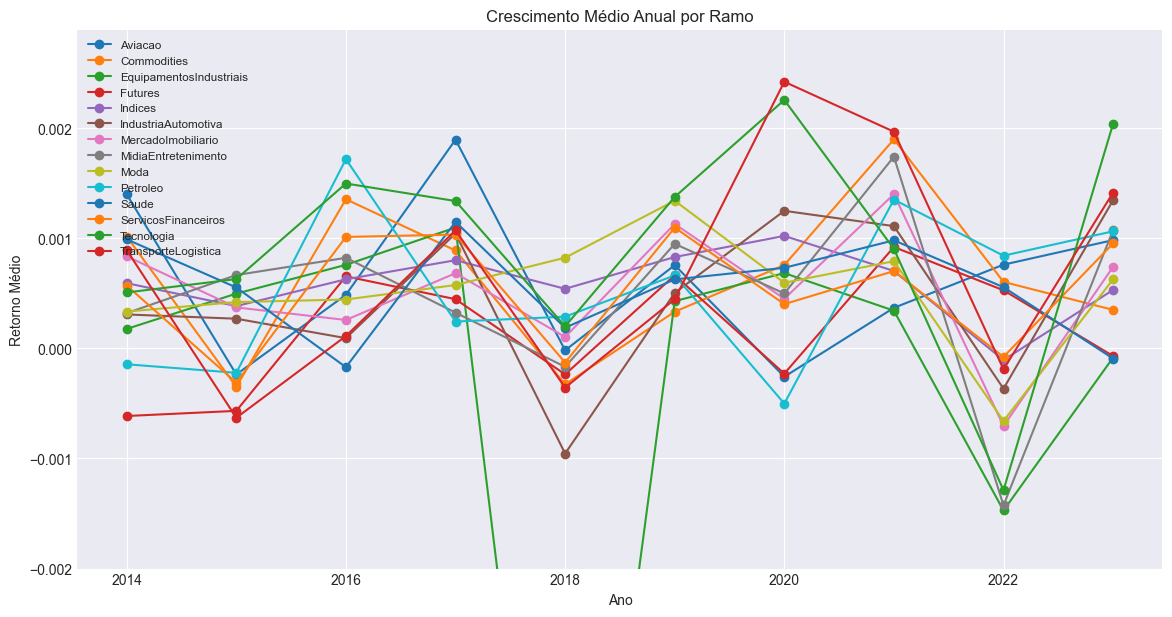

In [ ]:
# 3.2 Plotar o crescimento médio anual por setor
plt.figure(figsize=(14,7))
for setor in retorno_anual_setor['Ramo'].unique():
    subset = retorno_anual_setor[retorno_anual_setor['Ramo'] == setor]
    plt.plot(subset['Ano'], subset['Retorno'], marker='o', label=setor)

plt.title('Crescimento Médio Anual por Ramo')
plt.xlabel('Ano')
plt.ylabel('Retorno Médio')
plt.ylim(bottom=-0.002)  # Cortar o eixo y em -0.002
plt.legend(fontsize='small', framealpha=0.7)  # Diminuir a legenda e ajustar a transparência
plt.show()


In [89]:
# 3.3 Pivotar os dados para ter os retornos por setor em colunas
dados_previsao = retorno_anual_setor.pivot(index='Ano', columns='Ramo', values='Retorno')

# Preencher valores faltantes com zero (ou poderia usar interpolação)
dados_previsao.fillna(0, inplace=True)

# Visualizar os dados
dados_previsao.head()


Ramo,Aviacao,Commodities,EquipamentosIndustriais,Futures,Indices,IndustriaAutomotiva,MercadoImobiliario,MidiaEntretenimento,Moda,Petroleo,Saude,ServicosFinanceiros,Tecnologia,TransporteLogistica
Ano,,,,,,,,,,,,,,
2014,0.001399,0.001016,0.000177,-0.000614,0.000593,0.000308,0.000836,0.000321,0.000209,-0.000144,0.000990,0.000571,0.000508,0.000893
2015,-0.000237,-0.000349,0.000498,-0.000567,0.000384,0.000270,0.000372,0.000666,0.000270,-0.000222,0.000553,-0.000311,0.000630,-0.000630
2016,0.000487,0.001355,0.000759,0.000654,0.000628,0.000093,0.000258,0.000823,0.000499,0.001719,-0.000171,0.001012,0.001498,0.000112
2017,0.001896,0.000890,0.001098,0.000447,0.000801,0.001044,0.000683,0.000325,0.000648,0.000244,0.001150,0.001034,0.001339,0.001072
2018,-0.000018,-0.000326,-0.007056,-0.000236,0.000541,-0.000955,0.000103,-0.000167,0.000753,0.000288,0.000188,-0.000128,0.000200,-0.000356


In [90]:
# 3.4 Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
dados_normalizados = scaler.fit_transform(dados_previsao)

# Converter de volta para DataFrame
dados_normalizados = pd.DataFrame(dados_normalizados, columns=dados_previsao.columns, index=dados_previsao.index)


In [91]:
# 3.5 Converter os dados em formato adequado para LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back):
        X.append(dataset[i:(i+look_back), :])
        Y.append(dataset[i+look_back, :])
    return np.array(X), np.array(Y)

look_back = 3  # Número de anos anteriores para considerar
dataset = dados_normalizados.values
X, Y = create_dataset(dataset, look_back)

print("Formato de X:", X.shape)
print("Formato de Y:", Y.shape)


Formato de X: (7, 3, 14)
Formato de Y: (7, 14)


In [92]:
# 3.6 Dividir em treino e teste
train_size = X.shape[0] - 2  # Usar os últimos 2 anos para teste
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]


In [93]:
# 3.7 Construir o modelo LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, X.shape[2])))
model.add(Dense(X.shape[2]))  # Saída para cada setor
model.compile(loss='mean_squared_error', optimizer='adam')

# Treinar o modelo
history = model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)


Epoch 1/100


C:\Users\lucca\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 - 1s - 111ms/step - loss: 0.4529
Epoch 2/100
5/5 - 0s - 3ms/step - loss: 0.3582
Epoch 3/100
5/5 - 0s - 3ms/step - loss: 0.2778
Epoch 4/100
5/5 - 0s - 3ms/step - loss: 0.2222
Epoch 5/100
5/5 - 0s - 3ms/step - loss: 0.1642
Epoch 6/100
5/5 - 0s - 3ms/step - loss: 0.1182
Epoch 7/100
5/5 - 0s - 3ms/step - loss: 0.0984
Epoch 8/100
5/5 - 0s - 3ms/step - loss: 0.0918
Epoch 9/100
5/5 - 0s - 3ms/step - loss: 0.0878
Epoch 10/100
5/5 - 0s - 3ms/step - loss: 0.0890
Epoch 11/100
5/5 - 0s - 3ms/step - loss: 0.0872
Epoch 12/100
5/5 - 0s - 3ms/step - loss: 0.0825
Epoch 13/100
5/5 - 0s - 3ms/step - loss: 0.0837
Epoch 14/100
5/5 - 0s - 3ms/step - loss: 0.0813
Epoch 15/100
5/5 - 0s - 3ms/step - loss: 0.0800
Epoch 16/100
5/5 - 0s - 3ms/step - loss: 0.0794
Epoch 17/100
5/5 - 0s - 3ms/step - loss: 0.0803
Epoch 18/100
5/5 - 0s - 3ms/step - loss: 0.0781
Epoch 19/100
5/5 - 0s - 4ms/step - loss: 0.0776
Epoch 20/100
5/5 - 0s - 3ms/step - loss: 0.0765
Epoch 21/100
5/5 - 0s - 3ms/step - loss: 0.0761
Epoch 22/10

In [94]:
# 3.8 Fazer previsões no conjunto de teste
Y_pred = model.predict(X_test)

# Inverter a normalização
Y_test_inv = scaler.inverse_transform(Y_test)    
Y_pred_inv = scaler.inverse_transform(Y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Setor: Aviacao, RMSE: 0.0003


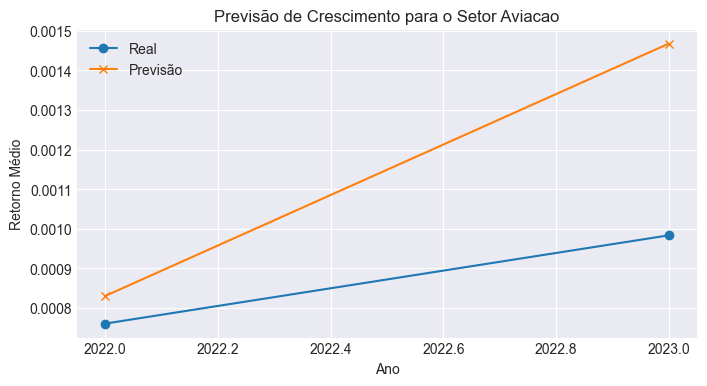

Setor: Commodities, RMSE: 0.0011


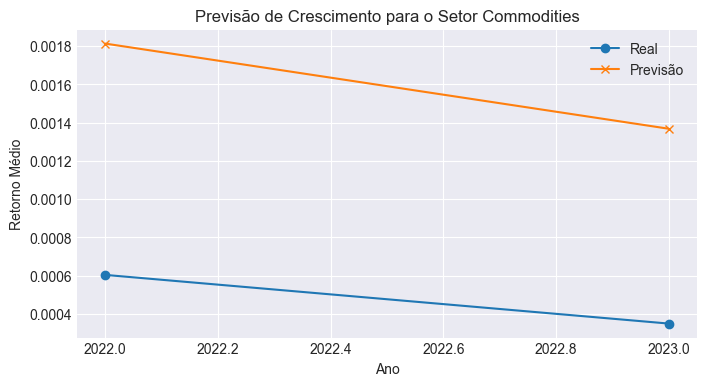

Setor: EquipamentosIndustriais, RMSE: 0.0058


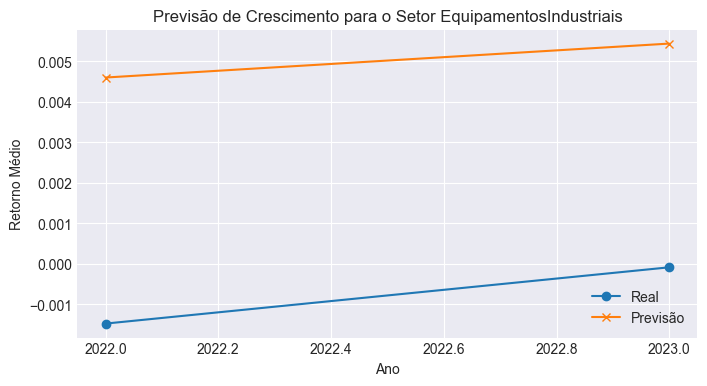

Setor: Futures, RMSE: 0.0009


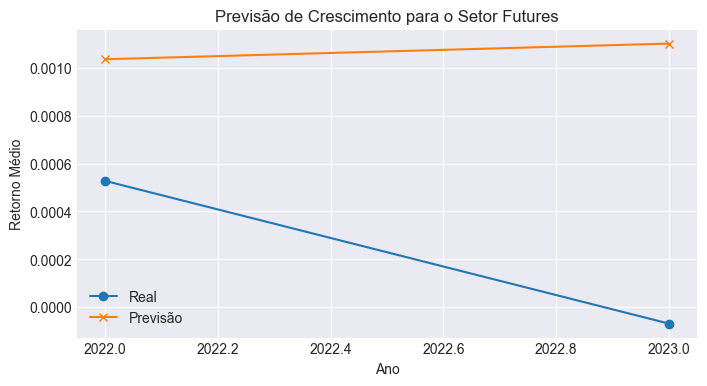

Setor: Indices, RMSE: 0.0009


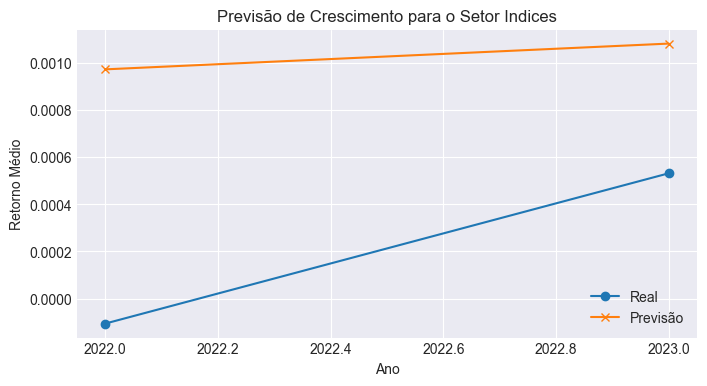

Setor: IndustriaAutomotiva, RMSE: 0.0017


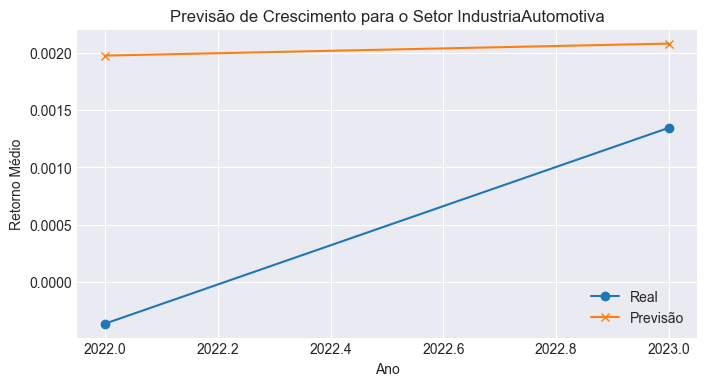

Setor: MercadoImobiliario, RMSE: 0.0017


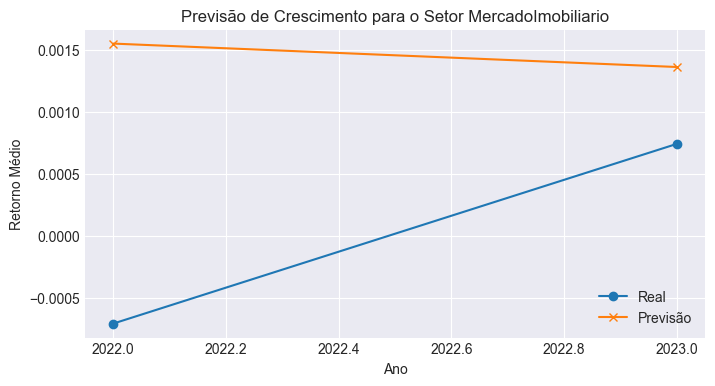

Setor: MidiaEntretenimento, RMSE: 0.0021


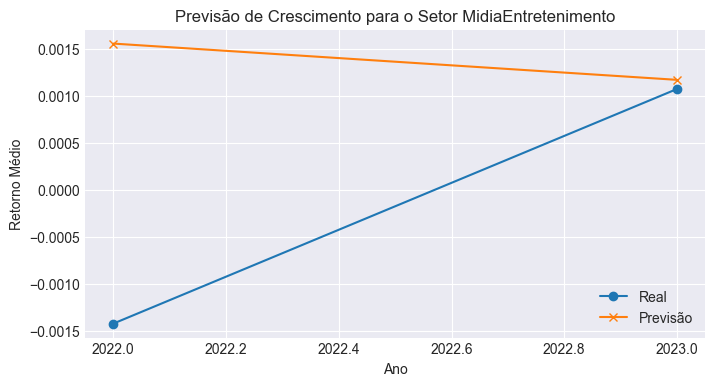

Setor: Moda, RMSE: 0.0011


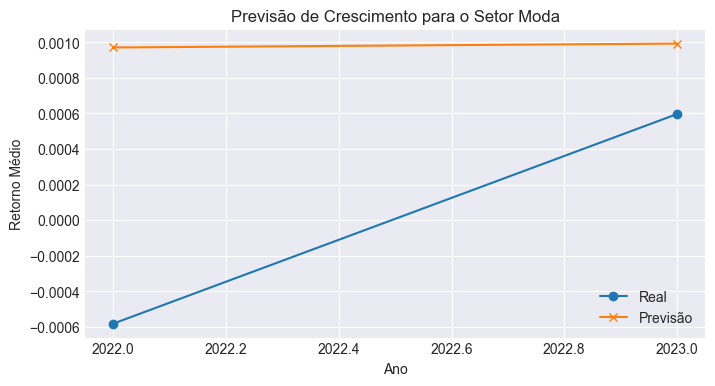

Setor: Petroleo, RMSE: 0.0004


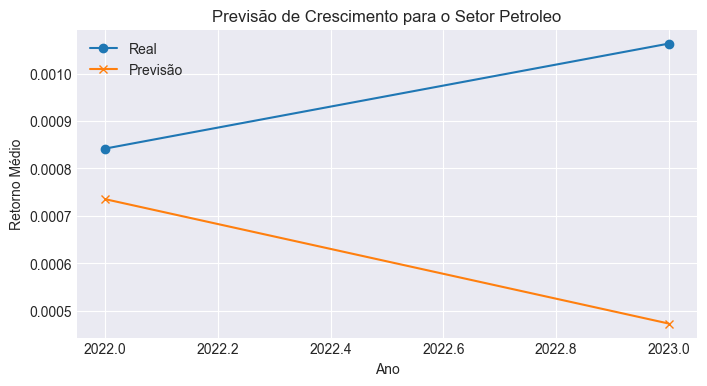

Setor: Saude, RMSE: 0.0011


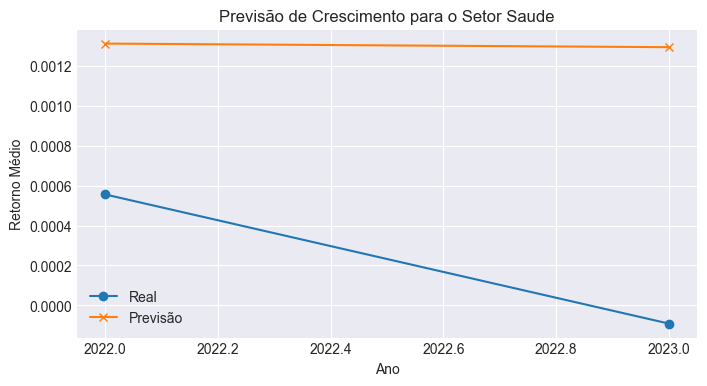

Setor: ServicosFinanceiros, RMSE: 0.0009


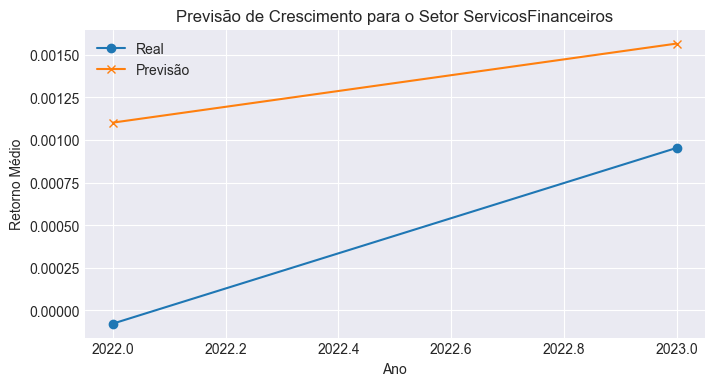

Setor: Tecnologia, RMSE: 0.0025


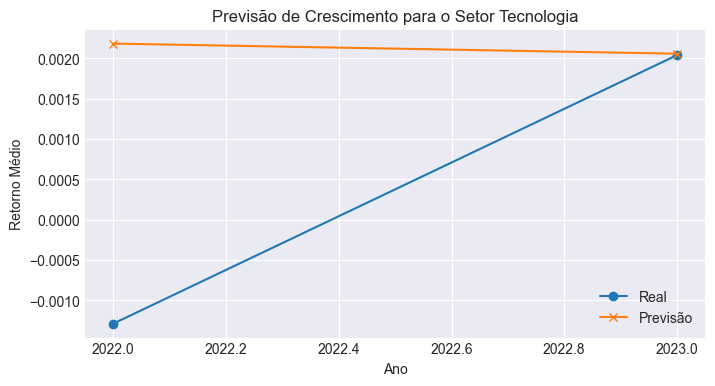

Setor: TransporteLogistica, RMSE: 0.0020


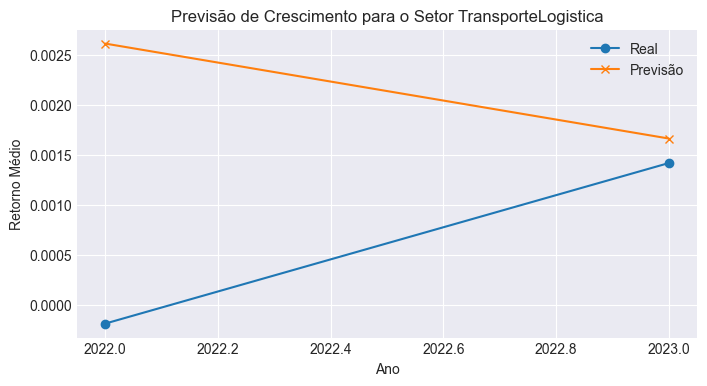

In [95]:
from sklearn.metrics import mean_squared_error

# 3.9 Calcular RMSE para cada setor
for i, setor in enumerate(dados_previsao.columns):
    rmse = np.sqrt(mean_squared_error(Y_test_inv[:, i], Y_pred_inv[:, i]))
    print(f"Setor: {setor}, RMSE: {rmse:.4f}")
    
    # Plotar previsões
    anos = dados_previsao.index[-(len(Y_test_inv)):]
    plt.figure(figsize=(8,4))
    plt.plot(anos, Y_test_inv[:, i], marker='o', label='Real')
    plt.plot(anos, Y_pred_inv[:, i], marker='x', label='Previsão')
    plt.title(f'Previsão de Crescimento para o Setor {setor}')
    plt.xlabel('Ano')
    plt.ylabel('Retorno Médio')
    plt.legend()
    plt.show()


In [96]:
# 3.10 Usar os últimos 'look_back' anos para prever o futuro
last_data = dataset[-look_back:]
future_predictions = []

num_future_years = 10
for _ in range(num_future_years):
    # Fazer previsão
    pred = model.predict(last_data.reshape(1, look_back, X.shape[2]))
    future_predictions.append(pred[0])
    # Atualizar last_data
    last_data = np.vstack([last_data[1:], pred])

# Inverter a normalização
future_predictions_inv = scaler.inverse_transform(future_predictions)

# Criar DataFrame com previsões futuras
future_years = range(dados_previsao.index[-1]+1, dados_previsao.index[-1]+num_future_years+1)
df_future = pd.DataFrame(future_predictions_inv, index=future_years, columns=dados_previsao.columns)

# Visualizar previsões futuras
df_future


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


Ramo,Aviacao,Commodities,EquipamentosIndustriais,Futures,Indices,IndustriaAutomotiva,MercadoImobiliario,MidiaEntretenimento,Moda,Petroleo,Saude,ServicosFinanceiros,Tecnologia,TransporteLogistica
2024,0.000660,-0.000010,-0.000132,0.000149,0.000748,0.000589,0.000703,0.000241,0.000835,0.000040,0.000684,0.000639,0.001324,0.000631
2025,0.000080,0.000161,-0.003961,0.000132,0.000592,-0.000290,0.000551,0.000440,0.000827,0.000547,0.000423,0.000226,0.000382,0.000141
2026,0.001086,0.001193,0.001385,0.000720,0.000809,0.001172,0.001273,0.001187,0.000974,0.000796,0.000985,0.001091,0.001432,0.001490
2027,0.000009,0.001105,-0.000289,0.000176,0.000910,0.000966,0.000704,0.000710,0.000679,0.000181,0.000817,0.000404,0.001449,0.002212
2028,0.000537,0.001630,0.003089,0.001122,0.000880,0.001462,0.001643,0.001816,0.001073,0.001086,0.001111,0.001070,0.001603,0.001974
2029,0.000476,0.001483,0.005320,0.000915,0.001078,0.001962,0.001474,0.001451,0.001033,0.000480,0.001290,0.001011,0.002515,0.002774
2030,0.000489,0.001962,0.005863,0.001297,0.001079,0.002048,0.001811,0.002087,0.001139,0.001020,0.001481,0.001086,0.002437,0.002856
2031,0.000604,0.001566,0.006609,0.001330,0.001163,0.002005,0.001826,0.002126,0.001226,0.000881,0.001497,0.001174,0.002904,0.002703
2032,0.000583,0.001739,0.007268,0.001325,0.001258,0.002215,0.001778,0.002289,0.001206,0.000843,0.001635,0.001159,0.003223,0.003068
2033,0.000519,0.001616,0.007111,0.001332,0.001269,0.002110,0.001770,0.002403,0.001233,0.000862,0.001621,0.001134,0.003304,0.002994


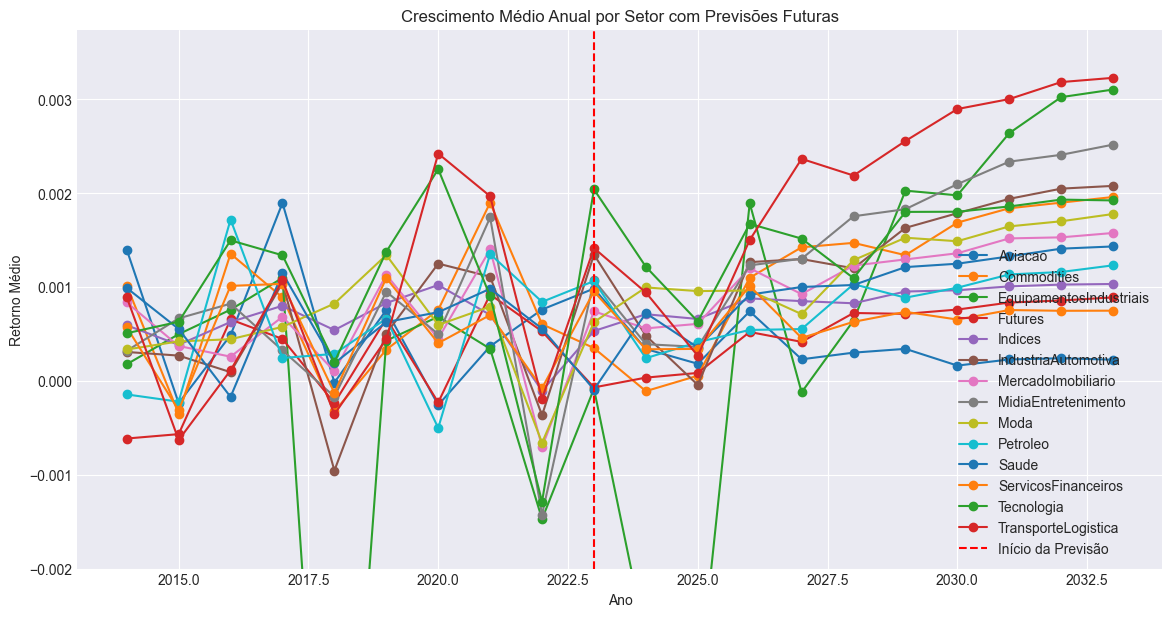

In [63]:
# 3.11 Concatenar dados reais e previsões
dados_completos = pd.concat([dados_previsao, df_future])

# Plotar o crescimento histórico e previsões futuras
plt.figure(figsize=(14,7))
for setor in dados_completos.columns:
    plt.plot(dados_completos.index, dados_completos[setor], marker='o', label=setor)

plt.axvline(x=dados_previsao.index[-1], color='r', linestyle='--', label='Início da Previsão')
plt.title('Crescimento Médio Anual por Setor com Previsões Futuras')
plt.xlabel('Ano')
plt.ylabel('Retorno Médio')
plt.ylim(bottom=-0.002)  # Cortar o eixo y em -0.002
plt.legend(fontsize='small', framealpha=0.7)  # Diminuir a legenda e ajustar a transparência
plt.legend()
plt.show()


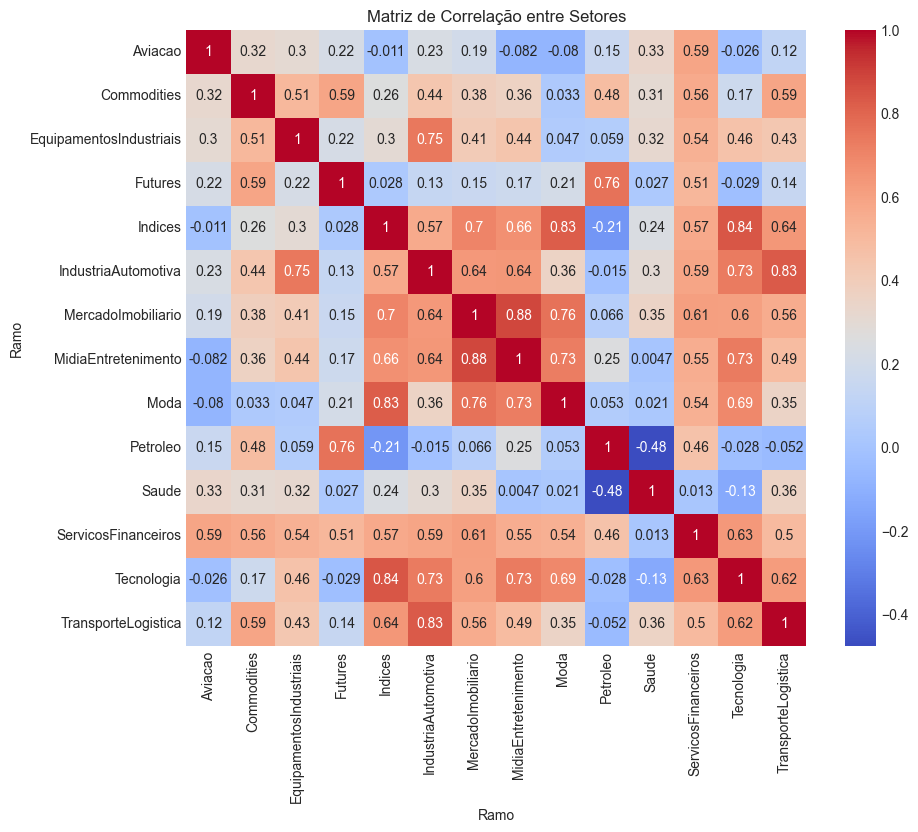

In [98]:

# 4.1 Usar os retornos médios anuais dos setores
dados_correlacao = dados_previsao.copy()

# Calcular a correlação entre os setores
matriz_correlacao = dados_correlacao.corr()

# Visualizar a matriz de correlação
plt.figure(figsize=(10,8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação entre Setores')
plt.show()

In [ ]:
# 4.2 Lista de setores
setores = dados_previsao.columns.tolist()

# Teste de causalidade de Granger entre setores
resultado_granger = {}

maxlag = 2  # Número máximo de lags a serem testados

for setor1 in setores:
    for setor2 in setores:
        if setor1 != setor2:
            test_result = grangercausalitytests(dados_previsao[[setor1, setor2]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0]['ssr_chi2test'][1],4) for i in range(maxlag)]
            min_p_value = np.min(p_values)
            resultado_granger[(setor1, setor2)] = min_p_value

# Converter resultados em DataFrame
df_granger = pd.DataFrame(resultado_granger.items(), columns=['Par', 'p_value'])
df_granger = df_granger[df_granger['p_value'] < 0.05]  # Considerando significância de 5%
df_granger.sort_values('p_value', inplace=True)
df_granger.head()


c:\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Python312\Lib\site-packages\sta

,Par,p_value
181,"(TransporteLogistica, Tecnologia)",0.0
110,"(Moda, MercadoImobiliario)",0.0
111,"(Moda, MidiaEntretenimento)",0.0
116,"(Moda, TransporteLogistica)",0.0
92,"(MidiaEntretenimento, Commodities)",0.0


In [100]:
# 4.3 Contar quantas vezes cada setor aparece como causador e causado
causador = df_granger['Par'].apply(lambda x: x[0]).value_counts()
causado = df_granger['Par'].apply(lambda x: x[1]).value_counts()

# Criar DataFrame com os resultados
df_influencia = pd.DataFrame({
    'Setor': setores,
    'Causa': [causador.get(s, 0) for s in setores],
    'Causado': [causado.get(s, 0) for s in setores]
})

# Calcular o grau de influência
df_influencia['Grau_Influencia'] = df_influencia['Causa'] - df_influencia['Causado']

# Visualizar os resultados
df_influencia.sort_values('Grau_Influencia', ascending=False, inplace=True)
df_influencia


,Setor,Causa,Causado,Grau_Influencia
9,Petroleo,11,4,7
4,Indices,9,4,5
10,Saude,9,5,4
11,ServicosFinanceiros,6,4,2
3,Futures,6,5,1
12,Tecnologia,7,6,1
2,EquipamentosIndustriais,3,3,0
1,Commodities,7,8,-1
7,MidiaEntretenimento,4,5,-1
8,Moda,7,8,-1


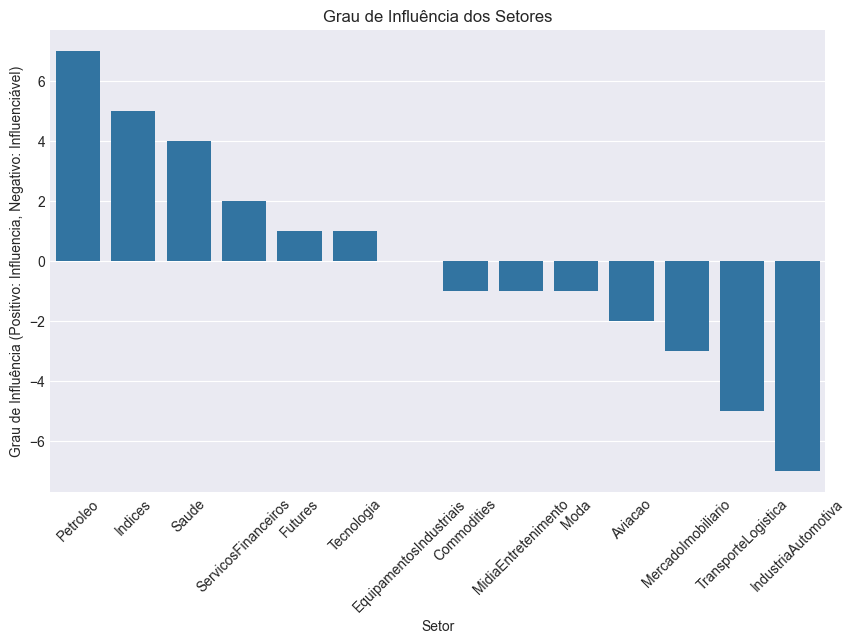

In [101]:
# 4.4 Plotar o grau de influência dos setores
plt.figure(figsize=(10,6))
sns.barplot(x='Setor', y='Grau_Influencia', data=df_influencia)
plt.title('Grau de Influência dos Setores')
plt.xlabel('Setor')
plt.ylabel('Grau de Influência (Positivo: Influencia, Negativo: Influenciável)')
plt.xticks(rotation=45)
plt.show()


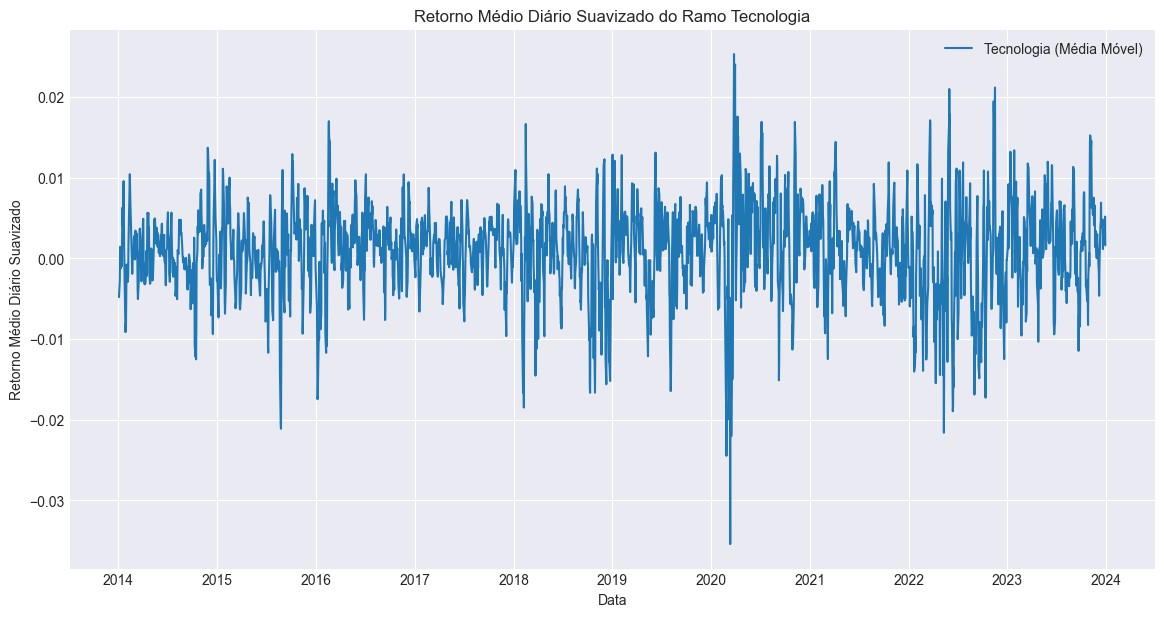

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Selecionar o ramo específico
ramo_escolhido = 'Tecnologia'  # Substitua pelo ramo desejado
df_ramo = df[df['Ramo'] == ramo_escolhido].copy()

# 2. Garantir que os dados estão ordenados
df_ramo.sort_values(by=['Simbolo', 'Data'], inplace=True)

# 3. Calcular o retorno diário
df_ramo['Retorno_Diario'] = df_ramo.groupby('Simbolo')['Fechamento'].pct_change()

# 4. Remover valores NaN
df_ramo.dropna(subset=['Retorno_Diario'], inplace=True)

# 5. Calcular o retorno médio diário
retorno_diario_ramo = df_ramo.groupby('Data')['Retorno_Diario'].mean().reset_index()

# 6. Aplicar média móvel para suavização
window_size = 5
retorno_diario_ramo['Retorno_Diario_Suavizado'] = retorno_diario_ramo['Retorno_Diario'].rolling(window=window_size, min_periods=1).mean()

# 7. Plotar os dados suavizados
plt.figure(figsize=(14,7))
plt.plot(retorno_diario_ramo['Data'], retorno_diario_ramo['Retorno_Diario_Suavizado'], label=f'{ramo_escolhido} (Média Móvel)')
plt.title(f'Retorno Médio Diário Suavizado do Ramo {ramo_escolhido}')
plt.xlabel('Data')
plt.ylabel('Retorno Médio Diário Suavizado')
plt.legend()
plt.grid(True)
plt.show()
